# Chapter 3

## Perceptron

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [2]:
rng = np.random.RandomState(123)

d = 2
N = 10
mean = 5

x1 = rng.randn(N,d) + np.array([0,0])
x2= rng.randn(N,d) + np.array([mean,mean])

In [3]:
x = np.concatenate((x1,x2), axis=0)

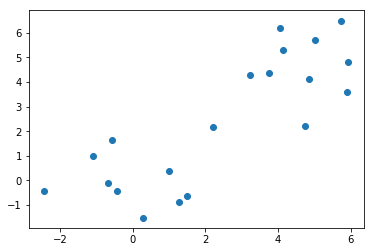

In [4]:
plt.scatter(x[:,0], x[:,1])

In [5]:
w = np.zeros(d)
b = 0

In [6]:
def y(x):
    return step(np.dot(w,x) + b)

def step(x):
    return 1 * (x > 0)

In [7]:
def t(i):
    if i < N:
        return 0
    else:
        return 1

In [8]:
while True:
    classified = True
    for i in range(N*2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
    if classified:
        break

In [9]:
print(w,b)

[ 2.14037745  1.2763927 ] -9


w[0] x1 + w[1] x2 - 9 = 0

In [10]:
def classifier(x):
    y = - (w[0]*x - 9) / w[1]
    return y

In [11]:
x2 = np.linspace(-3,6,10)

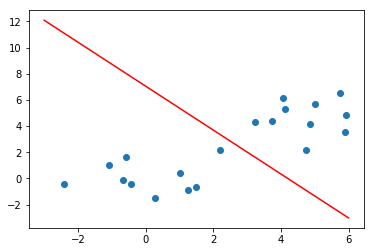

In [12]:
plt.scatter(x[:,0], x[:,1])
plt.plot(x2, classifier(x2), "r-")

## Logistic Regression

### TensofFlow implementation

In [13]:
import numpy as np
import tensorflow as tf

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [14]:
tf.set_random_seed(0)

w = tf.Variable( tf.zeros([2,1]) )
b = tf.Variable( tf.zeros([1]) )

x = tf.placeholder( tf.float32, shape=[None,2] )
t = tf.placeholder( tf.float32, shape=[None,1] )
y = tf.nn.sigmoid( tf.matmul(x,w) + b )

cross_entropy = - tf.reduce_sum( t * tf.log(y) + (1 - t) * tf.log(1 - y) )
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal( tf.to_float( tf.greater(y, 0.5) ), t )

In [15]:
X = np.array( [[0,0],[0,1],[1,0],[1,1]] )
Y = np.array( [[0],[1],[1],[1]] )

In [16]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(200):
    sess.run(train_step, feed_dict={x: X, t: Y})

In [17]:
classified = correct_prediction.eval( session=sess, feed_dict={x:X, t:Y} )
prob = y.eval( session=sess, feed_dict={x:X} )

print('classified: \n', classified)
print()
print('output prob: \n', prob)

classified: 
 [[ True]
 [ True]
 [ True]
 [ True]]

output prob: 
 [[ 0.22355038]
 [ 0.91425949]
 [ 0.91425949]
 [ 0.99747425]]


### Keras implementation

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [19]:
np.random.seed(0)

In [20]:
model = Sequential([
    Dense(input_dim=2, units=1)
    , Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

In [21]:
X = np.array( [[0,0],[0,1],[1,0],[1,1]] )
Y = np.array( [[0],[1],[1],[1]] )

In [22]:
model.fit(X, Y, epochs=200, batch_size=1)

Epoch 1/200
4/4 [==============================] - 0s 54ms/step - loss: 0.6378
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5876
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5494
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5195
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4957
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4763
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4609
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4480
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4363
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4262
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4176
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4095
Epoch 13/200
4/4 [==============================] - 0s 2ms/s

4/4 [==============================] - 0s 2ms/step - loss: 0.1775
Epoch 104/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 105/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1753
Epoch 106/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1742
Epoch 107/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1731
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1720
Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1709
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1699
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1688
Epoch 112/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1678
Epoch 113/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 114/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1658
Epoch 115/200
4/4 [==============================] - 0

In [23]:
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

print('classified: \n', Y==classes)
print()
print('output prob: \n', prob)

classified: 
 [[ True]
 [ True]
 [ True]
 [ True]]

output prob: 
 [[ 0.21971275]
 [ 0.91219962]
 [ 0.91892707]
 [ 0.99761462]]


## Multi class logistic regression

In [24]:
from sklearn.utils import shuffle

In [25]:
M = 2 # dimension of data
K = 3 # category number
n = 100 # data number
N = n * K

In [26]:
X1 = np.random.randn(n, M) + np.array([0,10])
X2 = np.random.randn(n, M) + np.array([5,5])
X3 = np.random.randn(n, M) + np.array([10,0])
Y1 = np.array( [[1,0,0] for i in range(n)] )
Y2 = np.array( [[0,1,0] for i in range(n)] )
Y3 = np.array( [[0,0,1] for i in range(n)] )

X = np.concatenate((X1,X2,X3), axis=0)
Y = np.concatenate((Y1,Y2,Y3), axis=0)

In [27]:
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [28]:
cross_entropy = tf.reduce_mean( - tf.reduce_sum(t * tf.log(y), reduction_indices=[1]) )

In [29]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [30]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [31]:
batch_size = 50
n_batches = N // batch_size

In [32]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={x: X_[start:end], t: Y_[start:end]})

In [33]:
X_, Y_ = shuffle(X, Y)

classified = correct_prediction.eval(session=sess, feed_dict={x: X_[0:10], t: Y_[0:10]})
prob= y.eval(session=sess, feed_dict={x: X_[0:10]})

print('classified: \n', classified)
print()
print('output prob: \n', prob)

classified: 
 [ True  True  True  True  True  True  True  True  True  True]

output prob: 
 [[  9.87101793e-01   1.28981732e-02   1.68365091e-08]
 [  1.48069450e-08   1.27297053e-02   9.87270236e-01]
 [  9.42837358e-01   5.71625009e-02   8.57398135e-08]
 [  9.81189609e-01   1.88103337e-02   4.06839078e-08]
 [  9.72227135e-04   8.97922814e-01   1.01104937e-01]
 [  1.43449532e-03   9.89790499e-01   8.77497531e-03]
 [  9.84440327e-01   1.55596351e-02   2.23890382e-08]
 [  5.62003329e-02   9.42173302e-01   1.62634731e-03]
 [  1.04750693e-02   9.81475592e-01   8.04932695e-03]
 [  9.92644548e-01   7.35544693e-03   3.31106809e-10]]


In [34]:
def classifier_01(x, w, b):
    y = - ( (w[0][0] - w[0][1]) * x + (b[0] - b[1]) ) / (w[1][0] - w[1][1])
    return y

In [35]:
def classifier_12(x, w, b):
    y = - ( (w[0][1] - w[0][2]) * x + (b[1] - b[2]) ) / (w[1][1] - w[1][2])
    return y

In [36]:
x = np.linspace(-5,15,15)

(-5, 15)

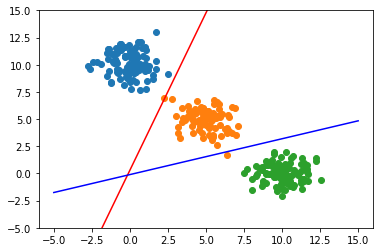

In [37]:
plt.scatter(X[0:100,0], X[0:100,1])
plt.scatter(X[100:200,0], X[100:200,1])
plt.scatter(X[200:300,0], X[200:300,1])

plt.plot(x, classifier_01(x, sess.run(W), sess.run(b)), "r-")
plt.plot(x, classifier_12(x, sess.run(W), sess.run(b)), "b-")

plt.ylim([-5,15])

## XOR

### Single layer

In [38]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [39]:
np.random.seed(0)

In [40]:
X = np.array( [[0,0], [0,1],[1,0],[1,1]] )
Y = np.array( [[0], [1],[1],[0]] )

In [41]:
model = Sequential([
    Dense(input_dim=2, output_dim=1)
    , Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
model.fit(X, Y, epochs=200, batch_size=1)

prob = model.predict_proba(X, batch_size=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, units=1)`
  


Epoch 1/200
4/4 [==============================] - 0s 59ms/step - loss: 0.7368
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7345
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7336
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7331
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7316
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7313
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7309
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7295
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7285
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7291
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7283
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7279
Epoch 13/200
4/4 [==============================] - 0s 2ms/s

4/4 [==============================] - 0s 2ms/step - loss: 0.7191
Epoch 105/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7191
Epoch 106/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7184
Epoch 107/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7191
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7184
Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7189
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7188
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7184
Epoch 112/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7191
Epoch 113/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7189
Epoch 114/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7184
Epoch 115/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7184
Epoch 116/200
4/4 [==============================] - 0

In [42]:
print(prob)

[[ 0.50616133]
 [ 0.50204116]
 [ 0.50288445]
 [ 0.49876401]]


### multi layer

In [43]:
X = np.array( [[0,0],[0,1],[1,0],[1,1]] )
Y = np.array( [[0],[1],[1],[0]] )

In [44]:
x = tf.placeholder(tf.float32, shape=[None,2])
t = tf.placeholder(tf.float32, shape=[None,1])

In [45]:
W = tf.Variable( tf.truncated_normal([2,2]) )
b = tf.Variable( tf.zeros([2]) )
h = tf.nn.sigmoid( tf.matmul(x,W) + b )

V = tf.Variable( tf.truncated_normal([2,1]) )
c = tf.Variable( tf.zeros([1]) )
y = tf.nn.sigmoid( tf.matmul(h,V) + c )

In [46]:
cross_entropy = - tf.reduce_sum( t * tf.log(y) + (1-t) * tf.log(1-y) )

In [47]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal( tf.to_float(tf.greater(y, 0.5)), t )

In [48]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


for epoch in range(4000):
    sess.run(train_step, feed_dict={x: X, t: Y})
    if epoch % 1000 == 0:
        print('epoch:', epoch)

epoch: 0
epoch: 1000
epoch: 2000
epoch: 3000


In [49]:
classified = correct_prediction.eval(session=sess, feed_dict={x: X, t: Y})
prob= y.eval(session=sess, feed_dict={x: X})

print('classified: \n', classified)
print()
print('output prob: \n', prob)

classified: 
 [[ True]
 [ True]
 [ True]
 [ True]]

output prob: 
 [[ 0.00882754]
 [ 0.99007154]
 [ 0.99007344]
 [ 0.01542784]]
